# Import bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Conversão do arquivo para utf-8

In [2]:
# Nome do arquivo CSV original e do novo arquivo
input_file = r'C:\Users\USER\Desktop\Projeto_Senac\Data\Most Streamed Spotify Songs 2024.csv'
output_file = r'C:\Users\USER\Desktop\Projeto_Senac\Data\Most Streamed Spotify Songs 2024_utf8.csv'

# Ler o arquivo CSV com a codificação original (substitua 'ISO-8859-1' pela codificação original, se necessário)
df = pd.read_csv(input_file, encoding='latin1')  # Altere a codificação se necessário

# Salvar o DataFrame em um novo arquivo CSV com codificação UTF-8
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Arquivo convertido e salvo como {output_file}")



Arquivo convertido e salvo como C:\Users\USER\Desktop\Projeto_Senac\Data\Most Streamed Spotify Songs 2024_utf8.csv


# Trantamento da base de dados


In [3]:
df_principal = pd.read_csv(r'C:\Users\USER\Desktop\Projeto_Senac\Data\Most Streamed Spotify Songs 2024_utf8.csv')

# Traduzindo os nomes das colunas para português
df_principal = df_principal.rename(columns={
    'Track': 'Nome da Música',
    'Album Name': 'Nome do Álbum',
    'Artist': 'Artista',
    'Release Date': 'Data de Lançamento',
    'ISRC': 'ISRC',
    'All Time Rank': 'Classificação Geral',
    'Track Score': 'Pontuação da Faixa',
    'Spotify Streams': 'Reproduções no Spotify',
    'Spotify Playlist Count': 'Contagem de Playlists no Spotify',
    'Spotify Playlist Reach': 'Alcance de Playlists no Spotify',
    'Spotify Popularity': 'Popularidade no Spotify',
    'YouTube Views': 'Visualizações no YouTube',
    'YouTube Likes': 'Curtidas no YouTube',
    'TikTok Posts': 'Postagens no TikTok',
    'TikTok Likes': 'Curtidas no TikTok',
    'TikTok Views': 'Visualizações no TikTok',
    'YouTube Playlist Reach': 'Alcance de Playlists no YouTube',
    'Apple Music Playlist Count': 'Contagem de Playlists no Apple Music',
    'AirPlay Spins': 'Reproduções no AirPlay',
    'SiriusXM Spins': 'Reproduções no SiriusXM',
    'Deezer Playlist Count': 'Contagem de Playlists no Deezer',
    'Deezer Playlist Reach': 'Alcance de Playlists no Deezer',
    'Amazon Playlist Count': 'Contagem de Playlists na Amazon',
    'Pandora Streams': 'Reproduções no Pandora',
    'Pandora Track Stations': 'Estações de Faixas no Pandora',
    'Soundcloud Streams': 'Reproduções no Soundcloud',
    'Shazam Counts': 'Contagens no Shazam',
    'TIDAL Popularity': 'Popularidade no TIDAL',
    'Explicit Track': 'Faixa Explícita'
})

# Convertendo todas as colunas para o mesmo tipo de dados (string)
df_principal = df_principal.astype(str)

df_principal['Faixa Explícita'] = df_principal['Faixa Explícita'].astype(int)

# Lista de colunas a serem convertidas
colunas = ['Reproduções no Spotify', 'Contagem de Playlists no Spotify', 'Alcance de Playlists no Spotify',
           'Popularidade no Spotify', 'Visualizações no YouTube', 'Curtidas no YouTube',
           'Postagens no TikTok', 'Curtidas no TikTok', 'Visualizações no TikTok',
           'Alcance de Playlists no YouTube', 'Contagem de Playlists no Apple Music',
           'Reproduções no AirPlay', 'Reproduções no SiriusXM', 'Contagem de Playlists no Deezer',
           'Alcance de Playlists no Deezer', 'Contagem de Playlists na Amazon',
           'Reproduções no Pandora', 'Estações de Faixas no Pandora', 'Reproduções no Soundcloud',
           'Contagens no Shazam']

df_principal[colunas] = df_principal[colunas].apply(lambda x: x.str.replace(',', '').astype(float))

df_principal['Ano de Lançamento'] = pd.to_datetime(df_principal['Data de Lançamento']).dt.year

# Gráfico 1: Evolução das Músicas Lançadas por Ano (a partir de 2014)


Explicação detalhada do gráfico:

Este gráfico de linhas apresenta a evolução da quantidade de músicas lançadas por ano, a partir de 2014.

- O eixo x mostra os anos em ordem cronológica, de 2014 até o ano mais recente disponível nos dados.
- O eixo y indica a quantidade de músicas lançadas em cada ano.
- Cada ponto azul na linha representa o número exato de músicas lançadas em um ano específico.
- A linha azul conectando os pontos ajuda a visualizar a tendência geral ao longo do tempo.
- A linha tracejada vermelha representa a tendência linear geral dos lançamentos no período analisado.
- Os rótulos nos pontos mostram o valor exato de músicas lançadas para cada ano.

Esta visualização nos permite identificar com clareza as tendências, picos e vales na produção musical nos últimos anos, oferecendo uma perspectiva mais recente e relevante dos dados.


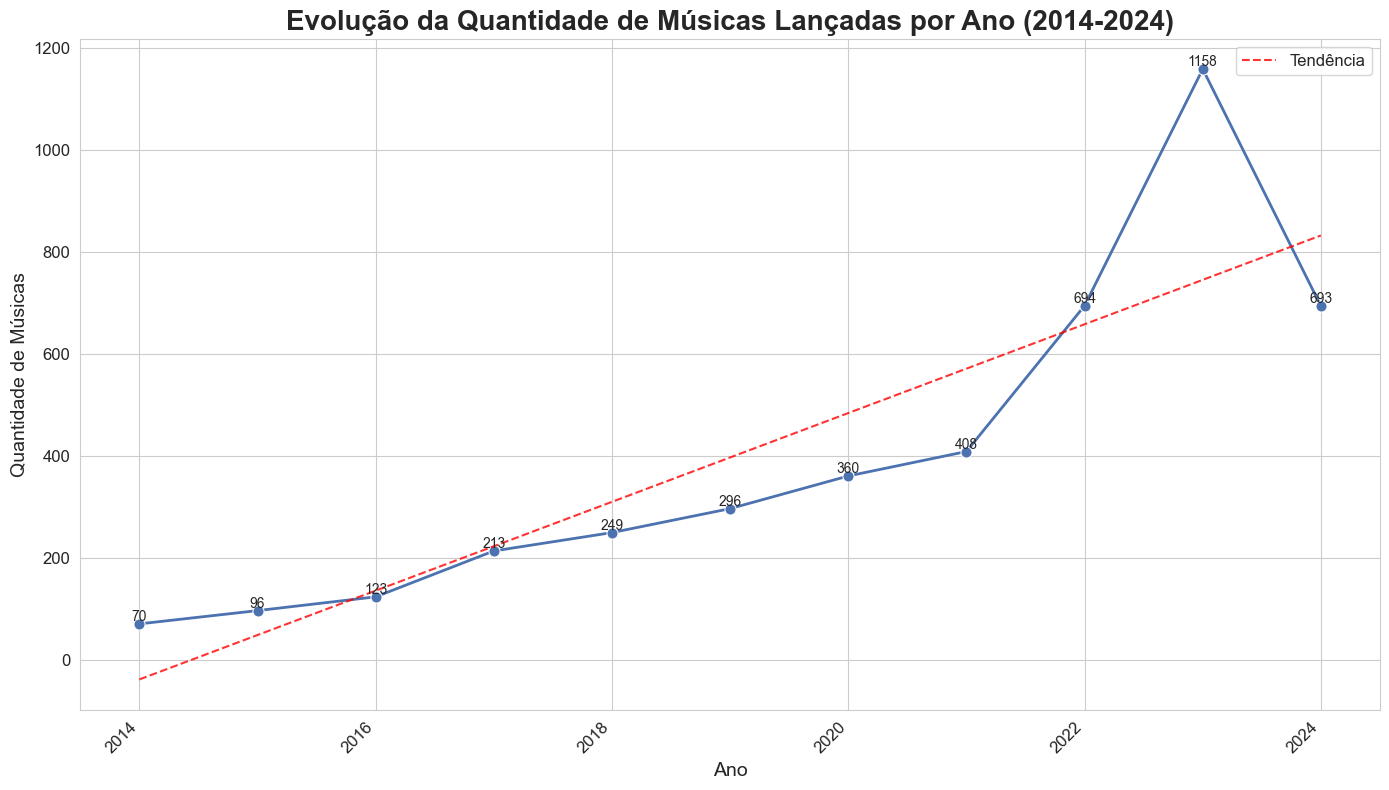

In [4]:
# Gráfico 1: Evolução das Músicas Lançadas por Ano (a partir de 2014)

# Configurando o estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")
sns.set_palette("deep")

# Extraindo o ano da coluna 'Data de Lançamento' e contando a quantidade de músicas por ano
df_principal['Ano'] = pd.to_datetime(df_principal['Data de Lançamento']).dt.year
musicas_por_ano = df_principal[df_principal['Ano'] >= 2014]['Ano'].value_counts().sort_index()

# Criando o gráfico de linhas
plt.figure(figsize=(14, 8))
sns.lineplot(x=musicas_por_ano.index, y=musicas_por_ano.values, marker='o', linewidth=2, markersize=8)

# Personalizando o gráfico
plt.title('Evolução da Quantidade de Músicas Lançadas por Ano (2014-2024)', fontsize=20, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Músicas', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

# Melhorando a legibilidade dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos de dados nos pontos
for x, y in zip(musicas_por_ano.index, musicas_por_ano.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

# Adicionando uma linha de tendência
z = np.polyfit(musicas_por_ano.index, musicas_por_ano.values, 1)
p = np.poly1d(z)
plt.plot(musicas_por_ano.index, p(musicas_por_ano.index), "r--", alpha=0.8, label='Tendência')

# Adicionando legenda
plt.legend(fontsize=12)

# Explicação detalhada do gráfico
print("\nExplicação detalhada do gráfico:")
print("\nEste gráfico de linhas apresenta a evolução da quantidade de músicas lançadas por ano, a partir de 2014.")
print("\n- O eixo x mostra os anos em ordem cronológica, de 2014 até o ano mais recente disponível nos dados.")
print("- O eixo y indica a quantidade de músicas lançadas em cada ano.")
print("- Cada ponto azul na linha representa o número exato de músicas lançadas em um ano específico.")
print("- A linha azul conectando os pontos ajuda a visualizar a tendência geral ao longo do tempo.")
print("- A linha tracejada vermelha representa a tendência linear geral dos lançamentos no período analisado.")
print("- Os rótulos nos pontos mostram o valor exato de músicas lançadas para cada ano.")
print("\nEsta visualização nos permite identificar com clareza as tendências, picos e vales na produção musical nos últimos anos, oferecendo uma perspectiva mais recente e relevante dos dados.")

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()




# Gráfico 2: Evolução das Reproduções no Spotify (2014-2023)

C:\Users\USER\AppData\Local\Temp\ipykernel_8444\665751322.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=reproducoes_por_ano.index, x=reproducoes_por_ano.values, palette='viridis', orient='h')



Explicação detalhada do gráfico:

Este gráfico de barras horizontais apresenta a evolução do total de reproduções de músicas no Spotify por ano, de 2014 a 2024.

- O eixo y representa os anos, de 2014 até o ano mais recente disponível nos dados.
- O eixo x indica o número total de reproduções para cada ano, em bilhões.
- Cada barra representa o total de reproduções para um ano específico, com cores gradientes para melhor visualização.
- Os rótulos no final de cada barra mostram o valor exato de reproduções para aquele ano, em bilhões.
- Linhas vermelhas tracejadas verticais foram adicionadas para destacar os valores do eixo x ao longo do gráfico.

Esta visualização profissional nos permite observar claramente as tendências de crescimento ou declínio nas reproduções de músicas no Spotify ao longo dos anos, oferecendo insights valiosos sobre a popularidade e o consumo de música na plataforma.


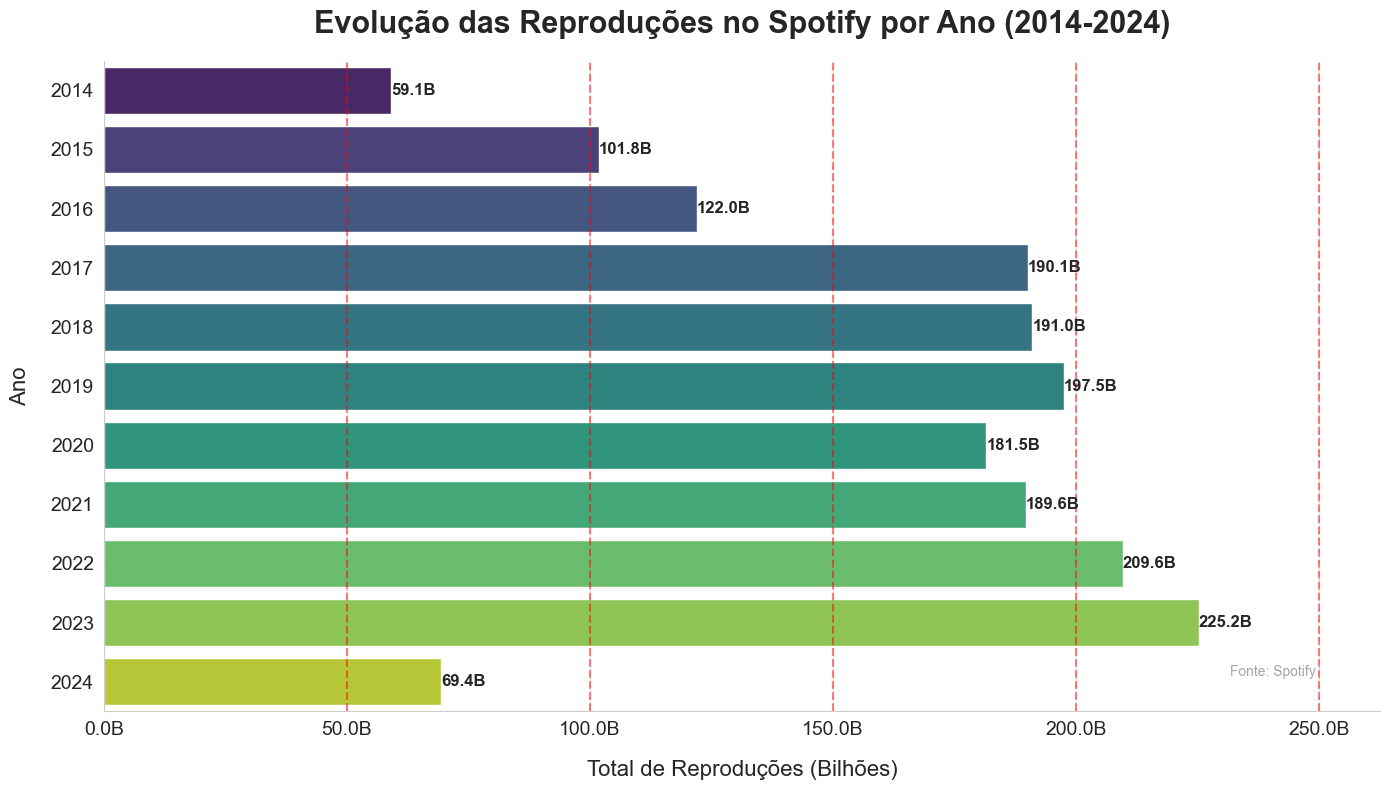

In [5]:
# Gráfico 2: Evolução das Reproduções no Spotify (2014-2023)

# Extraindo o ano da coluna 'Data de Lançamento' e calculando a soma das reproduções por ano
df_principal['Ano'] = pd.to_datetime(df_principal['Data de Lançamento']).dt.year
reproducoes_por_ano = df_principal[df_principal['Ano'] >= 2014].groupby('Ano')['Reproduções no Spotify'].sum().sort_index()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(14, 8))
ax = sns.barplot(y=reproducoes_por_ano.index, x=reproducoes_por_ano.values, palette='viridis', orient='h')

# Personalizando o gráfico
plt.title('Evolução das Reproduções no Spotify por Ano (2014-2024)', fontsize=22, fontweight='bold', pad=20)
plt.ylabel('Ano', fontsize=16, labelpad=15)
plt.xlabel('Total de Reproduções (Bilhões)', fontsize=16, labelpad=15)
plt.tick_params(axis='both', which='major', labelsize=14)

# Melhorando a legibilidade dos rótulos do eixo y
plt.yticks(rotation=0)

# Adicionando rótulos de dados nas barras
for i, v in enumerate(reproducoes_por_ano.values):
    ax.text(v, i, f'{v/1e9:.1f}B', ha='left', va='center', fontsize=12, fontweight='bold')

# Formatando o eixo x para melhor legibilidade
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# Adicionando linhas vermelhas verticais para os valores do eixo x
x_ticks = plt.gca().get_xticks()
for x in x_ticks:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.5, ymin=0, ymax=1)

# Adicionando uma grade sutil
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Removendo as bordas do gráfico
sns.despine()

# Adicionando uma marca d'água
plt.text(0.95, 0.05, 'Fonte: Spotify', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes, alpha=0.7)

# Explicação detalhada do gráfico
print("\nExplicação detalhada do gráfico:")
print("\nEste gráfico de barras horizontais apresenta a evolução do total de reproduções de músicas no Spotify por ano, de 2014 a 2024.")
print("\n- O eixo y representa os anos, de 2014 até o ano mais recente disponível nos dados.")
print("- O eixo x indica o número total de reproduções para cada ano, em bilhões.")
print("- Cada barra representa o total de reproduções para um ano específico, com cores gradientes para melhor visualização.")
print("- Os rótulos no final de cada barra mostram o valor exato de reproduções para aquele ano, em bilhões.")
print("- Linhas vermelhas tracejadas verticais foram adicionadas para destacar os valores do eixo x ao longo do gráfico.")
print("\nEsta visualização profissional nos permite observar claramente as tendências de crescimento ou declínio nas reproduções de músicas no Spotify ao longo dos anos, oferecendo insights valiosos sobre a popularidade e o consumo de música na plataforma.")

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()


# Gráfico 3: Distribuição de Faixas Explícitas e Não Explícitas (2014 - 2023)

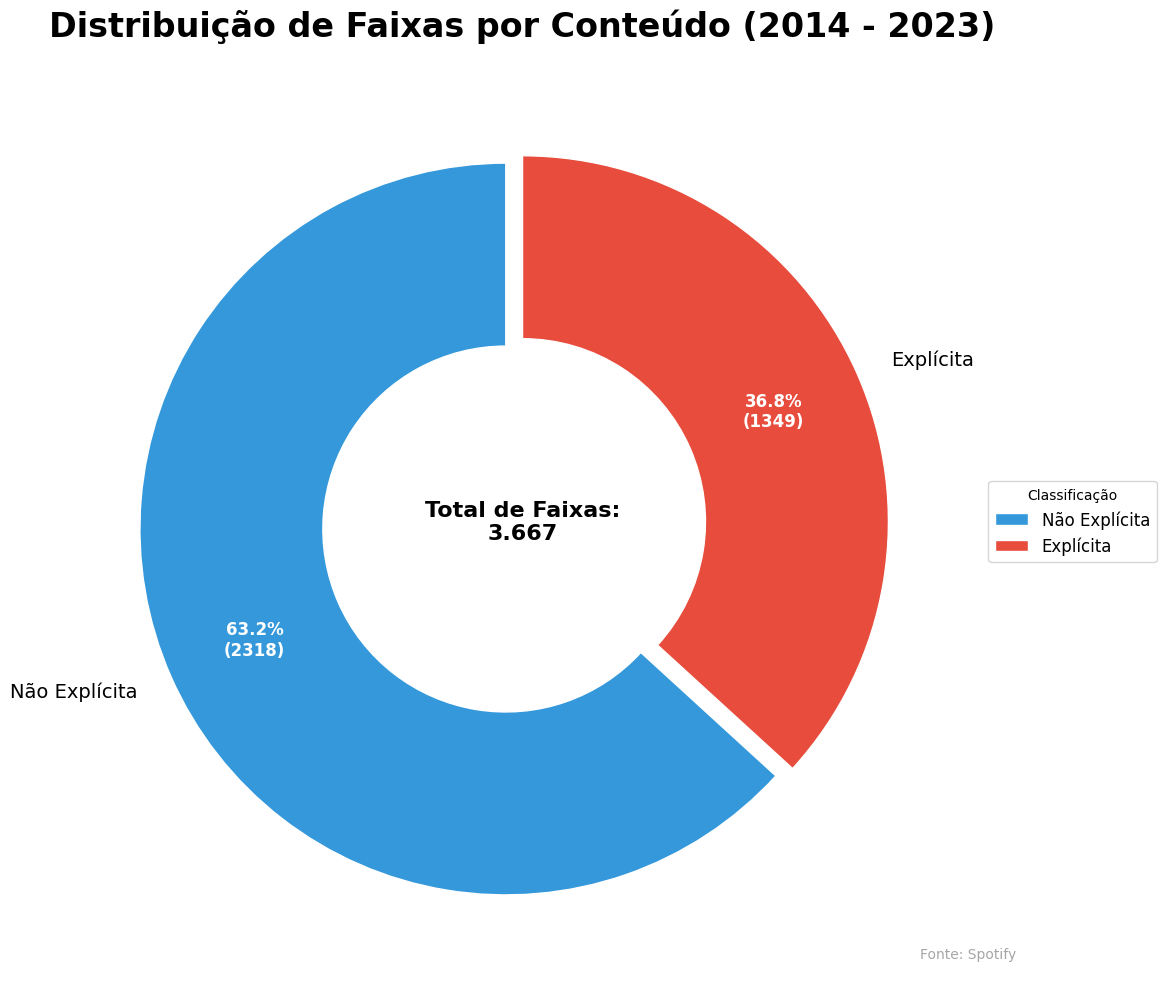


Legenda Explicativa:

Este gráfico de rosca apresenta a distribuição de faixas explícitas e não explícitas no Spotify entre 2014 e 2023.

1. Cores:
   - Azul (#3498db): Representa as faixas não explícitas
   - Vermelho (#e74c3c): Representa as faixas explícitas

2. Dados:
   - Total de faixas analisadas: 3.667
   - Faixas não explícitas: 2.318 (63.2%)
   - Faixas explícitas: 1.349 (36.8%)

3. Elementos do gráfico:
   - O gráfico de rosca permite uma visualização clara da proporção entre os dois tipos de faixas
   - A fatia maior (não explícita) está ligeiramente destacada para melhor visualização
   - Os percentuais e números absolutos são exibidos em cada fatia do gráfico
   - O total de faixas é apresentado no centro do gráfico

4. Interpretação:
   - Este gráfico nos permite observar rapidamente a prevalência de faixas não explícitas em relação às explícitas
   - É possível inferir tendências sobre o conteúdo das músicas no Spotify durante o período analisado

Esta visualização ofe

In [6]:
# Gráfico de Rosca: Distribuição de Faixas Explícitas e Não Explícitas (2014 - 2023)

# Filtrando dados para o intervalo de 2014 a 2023
df_filtrado = df_principal[(df_principal['Ano de Lançamento'] >= 2014) & (df_principal['Ano de Lançamento'] <= 2023)]

# Contagem de faixas explícitas e não explícitas
contagem_explicitas = df_filtrado['Faixa Explícita'].value_counts()

# Configuração do estilo
plt.style.use('default')  # Mudando para o estilo padrão do matplotlib
plt.figure(figsize=(14, 10))

# Criando o gráfico de rosca
cores = ['#3498db', '#e74c3c']  # Azul e vermelho mais suaves
explode = (0.05, 0)  # Destaque sutil para a fatia maior

wedges, texts, autotexts = plt.pie(contagem_explicitas.values, 
                                   explode=explode, 
                                   labels=['Não Explícita', 'Explícita'], 
                                   colors=cores, 
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(contagem_explicitas))})',
                                   startangle=90, 
                                   pctdistance=0.75,
                                   wedgeprops=dict(width=0.5, edgecolor='white'))

# Personalizando os textos
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=14)

# Adicionando um círculo no centro para criar o efeito de rosca
centro_circulo = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Personalizando o gráfico
plt.title('Distribuição de Faixas por Conteúdo (2014 - 2023)', fontsize=24, fontweight='bold', pad=20)
plt.legend(wedges, ['Não Explícita', 'Explícita'], 
           title="Classificação",
           loc="center left", 
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12)

# Adicionando uma marca d'água
plt.text(1.35, -1.2, 'Fonte: Spotify', fontsize=10, color='gray', ha='right', va='bottom', alpha=0.7)

# Adicionando informações adicionais
total_faixas = sum(contagem_explicitas)
plt.text(0, 0, f'Total de Faixas:\n{total_faixas:,}'.replace(',', '.'), 
         ha='center', va='center', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.show()

# Legenda explicativa
print("\nLegenda Explicativa:")
print("\nEste gráfico de rosca apresenta a distribuição de faixas explícitas e não explícitas no Spotify entre 2014 e 2023.")
print("\n1. Cores:")
print("   - Azul (#3498db): Representa as faixas não explícitas")
print("   - Vermelho (#e74c3c): Representa as faixas explícitas")
print("\n2. Dados:")
print(f"   - Total de faixas analisadas: {total_faixas:,}".replace(',', '.'))
print(f"   - Faixas não explícitas: {contagem_explicitas.iloc[0]:,} ({contagem_explicitas.iloc[0]/total_faixas*100:.1f}%)".replace(',', '.'))
print(f"   - Faixas explícitas: {contagem_explicitas.iloc[1]:,} ({contagem_explicitas.iloc[1]/total_faixas*100:.1f}%)".replace(',', '.'))
print("\n3. Elementos do gráfico:")
print("   - O gráfico de rosca permite uma visualização clara da proporção entre os dois tipos de faixas")
print("   - A fatia maior (não explícita) está ligeiramente destacada para melhor visualização")
print("   - Os percentuais e números absolutos são exibidos em cada fatia do gráfico")
print("   - O total de faixas é apresentado no centro do gráfico")
print("\n4. Interpretação:")
print("   - Este gráfico nos permite observar rapidamente a prevalência de faixas não explícitas em relação às explícitas")
print("   - É possível inferir tendências sobre o conteúdo das músicas no Spotify durante o período analisado")
print("\nEsta visualização oferece insights valiosos sobre a distribuição de conteúdo explícito e não explícito no catálogo do Spotify, auxiliando na compreensão das tendências musicais e preferências dos ouvintes.")


# Grafico 4: Top 10 Artistas Mais Reproduzidos no Spotify em 2024

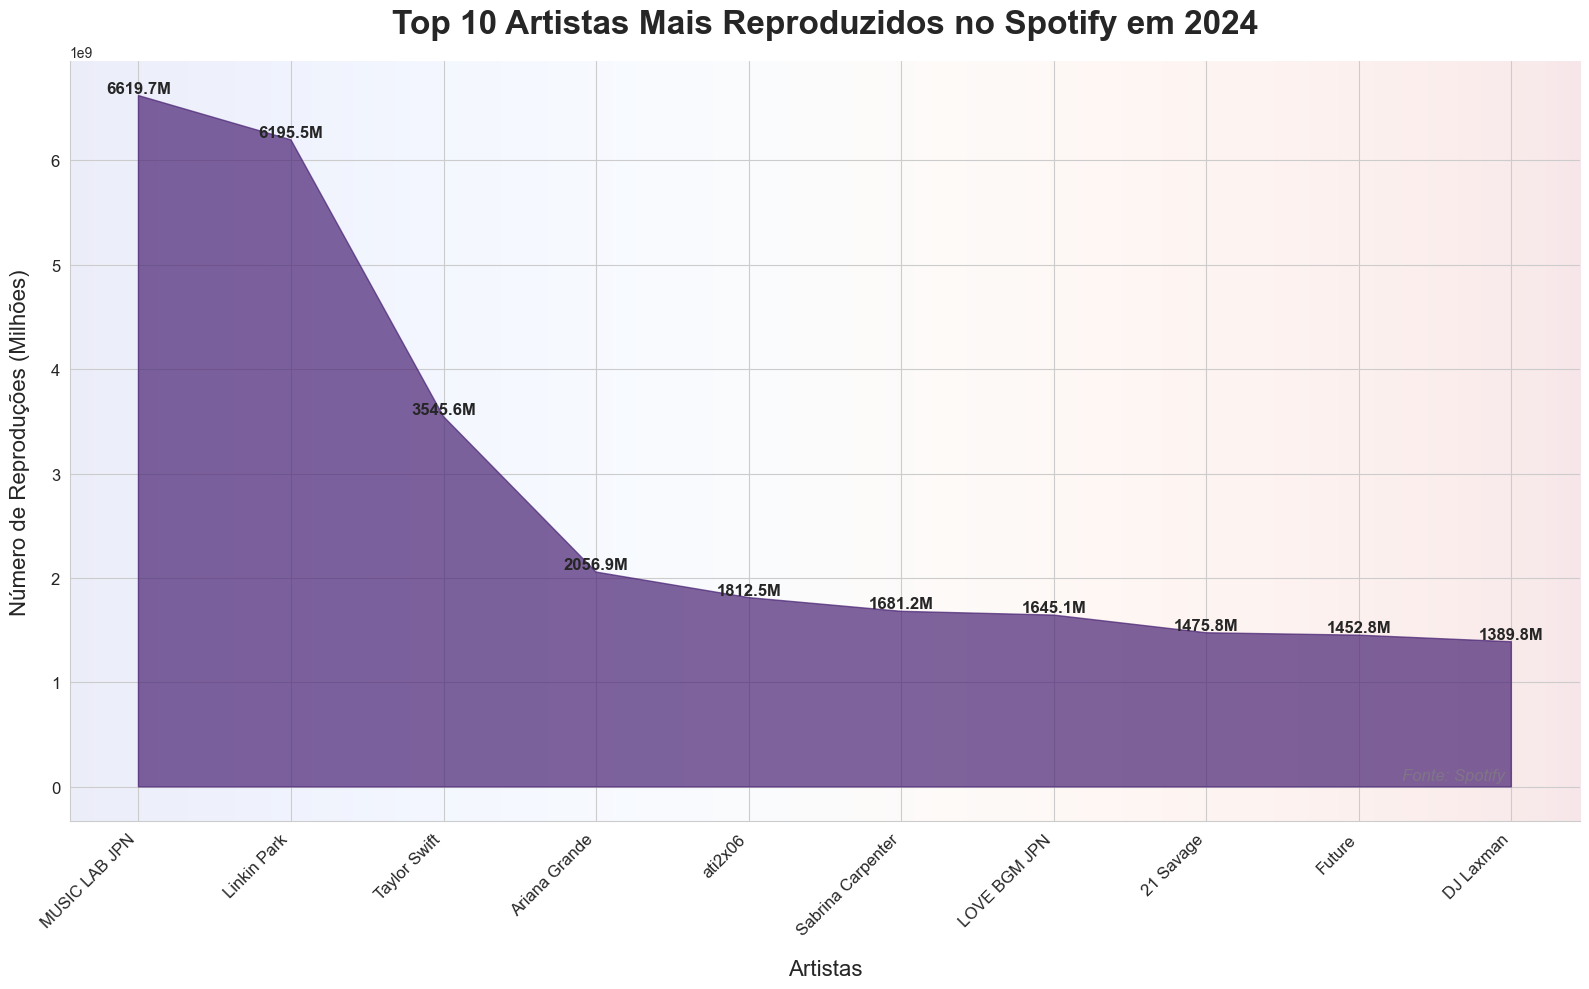


Legenda Explicativa:

Este gráfico de área apresenta os 10 artistas mais reproduzidos no Spotify em 2024.

1. Eixos:
   - Eixo X: Nomes dos artistas
   - Eixo Y: Número de reproduções em milhões

2. Cores:
   - O gráfico utiliza uma paleta de cores 'viridis', que varia do azul ao amarelo
   - Cada artista é representado por uma cor única nesta paleta

3. Elementos do gráfico:
   - Área preenchida: Representa o volume de reproduções para cada artista
   - Valores no topo: Mostram o número exato de reproduções em milhões
   - Gradiente de fundo: Adiciona profundidade visual ao gráfico

4. Interpretação:
   - A altura da área para cada artista indica sua popularidade relativa
   - O artista à esquerda é o mais reproduzido, com os seguintes em ordem decrescente

5. Observações adicionais:
   - O gráfico fornece uma visão rápida dos artistas mais populares no Spotify em 2024
   - Permite comparações fáceis entre os níveis de popularidade dos artistas

Esta visualização oferece insights val

In [7]:
# Grafico de Area Top 10 Artistas Mais Reproduzidos no Spotify em 2024
# Vamos filtrar para o ano de 2024 e ordenar pelos artistas mais reproduzidos
df_principal['Ano de Lançamento'] = pd.to_datetime(df_principal['Data de Lançamento']).dt.year
top_artistas_2024 = df_principal[df_principal['Ano de Lançamento'] == 2024].groupby('Artista')['Reproduções no Spotify'].sum().sort_values(ascending=False).head(10)

# Configurando o estilo
plt.style.use('default')  # Mudando para o estilo padrão do matplotlib
sns.set_style("whitegrid")  # Aplicando um estilo do Seaborn
fig, ax = plt.subplots(figsize=(16, 10))

# Criando o gráfico de área
cores = sns.color_palette("viridis", n_colors=len(top_artistas_2024))
ax.fill_between(top_artistas_2024.index, top_artistas_2024.values, color=cores, alpha=0.7)

# Personalizando o gráfico
ax.set_title('Top 10 Artistas Mais Reproduzidos no Spotify em 2024', fontsize=24, fontweight='bold', pad=20)
ax.set_xlabel('Artistas', fontsize=16, labelpad=15)
ax.set_ylabel('Número de Reproduções (Milhões)', fontsize=16, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=12)

# Rotacionando e ajustando os rótulos do eixo x
plt.xticks(rotation=45, ha='right')
fig.autofmt_xdate(rotation=45, ha='right')

# Adicionando valores nos pontos
for i, valor in enumerate(top_artistas_2024.values):
    ax.text(i, valor, f'{valor/1e6:.1f}M', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Removendo as bordas do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionando uma marca d'água
ax.text(0.95, 0.05, 'Fonte: Spotify', fontsize=12, color='gray', ha='right', va='bottom', 
        alpha=0.7, transform=ax.transAxes, style='italic')

# Adicionando um gradiente de fundo
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], 
          aspect='auto', alpha=0.1, cmap='coolwarm')

plt.tight_layout()
plt.show()

# Legenda explicativa
print("\nLegenda Explicativa:")
print("\nEste gráfico de área apresenta os 10 artistas mais reproduzidos no Spotify em 2024.")
print("\n1. Eixos:")
print("   - Eixo X: Nomes dos artistas")
print("   - Eixo Y: Número de reproduções em milhões")
print("\n2. Cores:")
print("   - O gráfico utiliza uma paleta de cores 'viridis', que varia do azul ao amarelo")
print("   - Cada artista é representado por uma cor única nesta paleta")
print("\n3. Elementos do gráfico:")
print("   - Área preenchida: Representa o volume de reproduções para cada artista")
print("   - Valores no topo: Mostram o número exato de reproduções em milhões")
print("   - Gradiente de fundo: Adiciona profundidade visual ao gráfico")
print("\n4. Interpretação:")
print("   - A altura da área para cada artista indica sua popularidade relativa")
print("   - O artista à esquerda é o mais reproduzido, com os seguintes em ordem decrescente")
print("\n5. Observações adicionais:")
print("   - O gráfico fornece uma visão rápida dos artistas mais populares no Spotify em 2024")
print("   - Permite comparações fáceis entre os níveis de popularidade dos artistas")
print("\nEsta visualização oferece insights valiosos sobre as tendências musicais e preferências dos ouvintes no Spotify para o ano de 2024.")


# Gráfico 5:Reproduções por Plataforma (2014-2024)

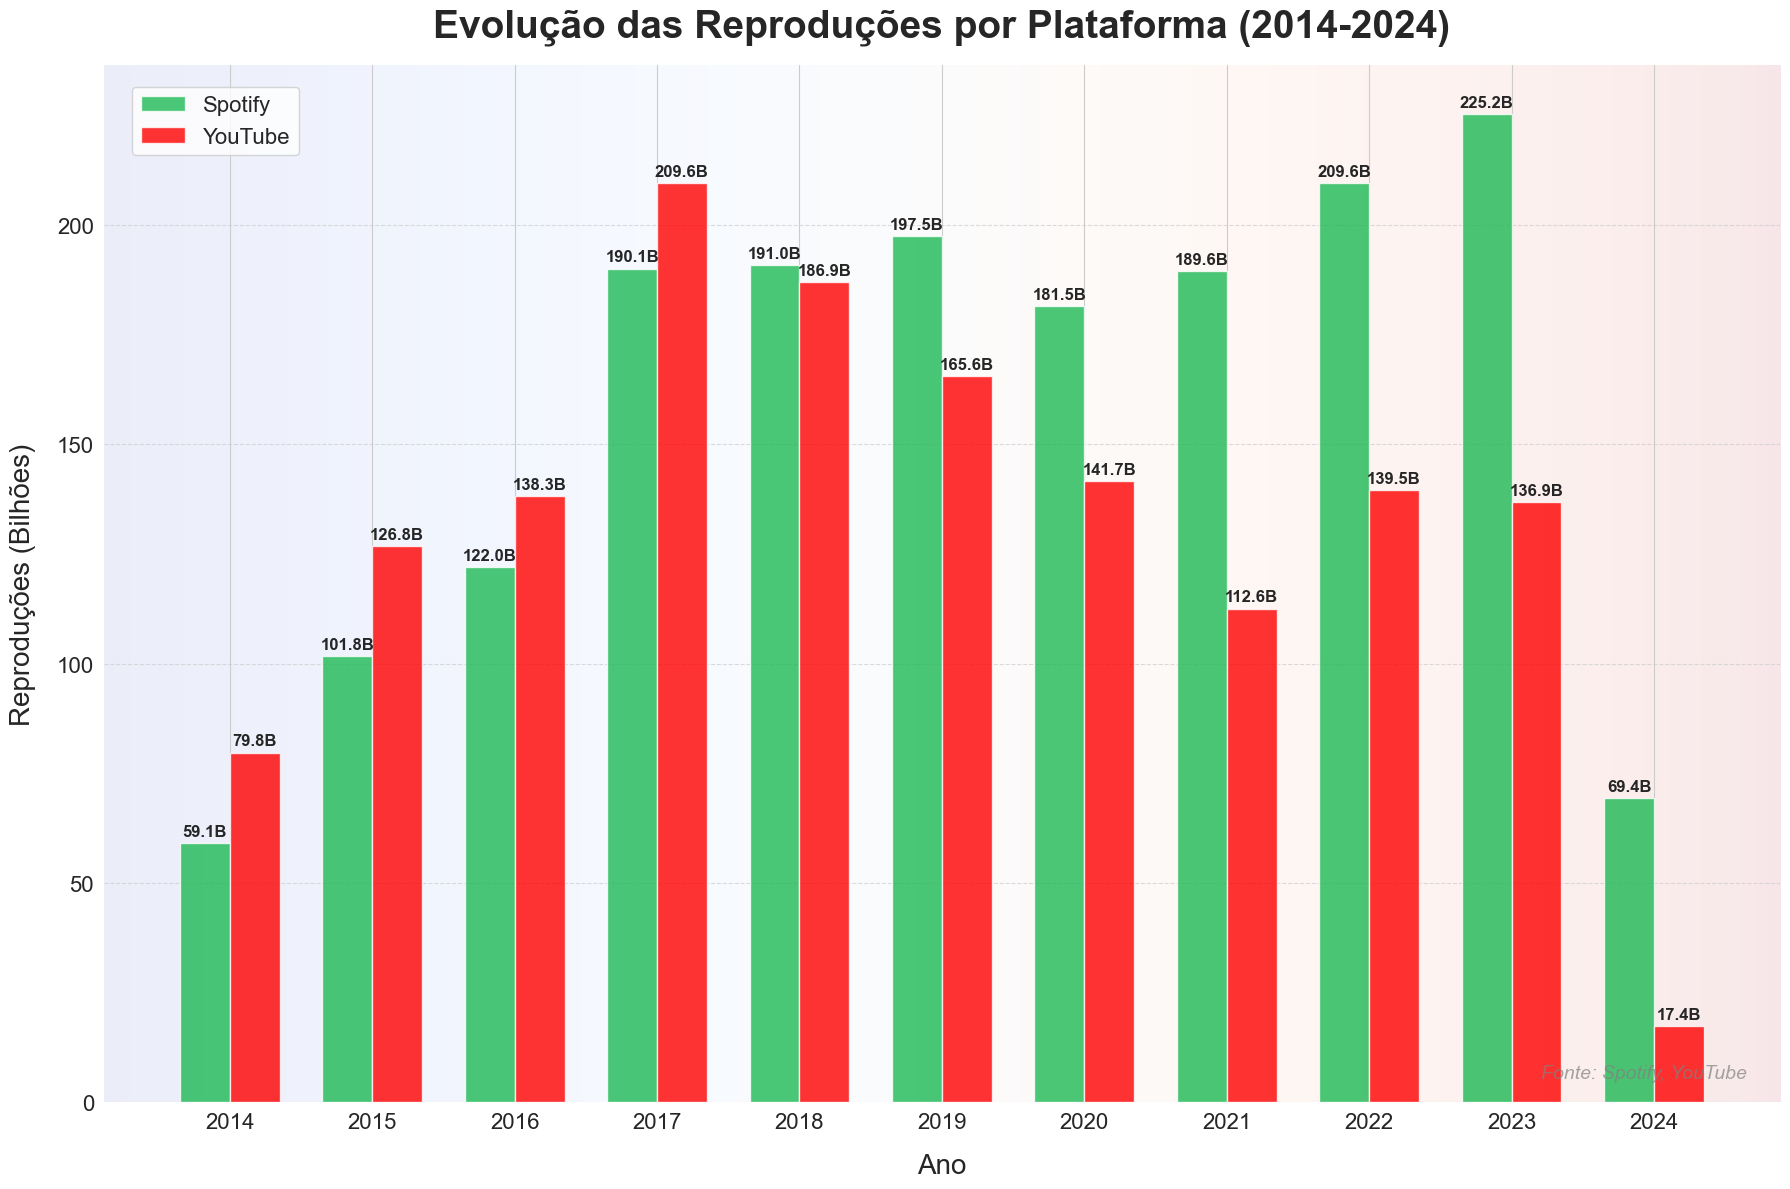


Legenda Explicativa:

Este gráfico de colunas apresenta a evolução das reproduções no Spotify e visualizações no YouTube de 2014 a 2024.

1. Eixos:
   - Eixo X: Anos de 2014 a 2024
   - Eixo Y: Número de reproduções/visualizações em bilhões

2. Cores:
   - Verde (#1DB954): Representa as reproduções no Spotify
   - Vermelho (#FF0000): Representa as visualizações no YouTube

3. Elementos do gráfico:
   - Colunas: Cada par de colunas representa o número de reproduções/visualizações para Spotify e YouTube em um ano específico
   - Valores no topo: Mostram o número exato de reproduções/visualizações em bilhões
   - Linhas de grade: Facilitam a leitura dos valores no eixo Y
   - Gradiente de fundo: Adiciona profundidade visual ao gráfico

4. Interpretação:
   - A altura de cada coluna indica o volume de reproduções/visualizações para cada plataforma em cada ano
   - Permite comparar facilmente o desempenho do Spotify e do YouTube ao longo dos anos

5. Observações adicionais:
   - O gráfico 

In [8]:
# Gráfico de Reproduções por Plataforma (2014-2024)

# Criando um DataFrame com o total de reproduções por ano e plataforma
df_reproducoes = df_principal.groupby('Ano de Lançamento').agg({
    'Reproduções no Spotify': 'sum',
    'Visualizações no YouTube': 'sum'
}).reset_index()

# Filtrando os anos de 2014 a 2024
df_reproducoes = df_reproducoes[(df_reproducoes['Ano de Lançamento'] >= 2014) & (df_reproducoes['Ano de Lançamento'] <= 2024)]

# Configurando o estilo
plt.style.use('default')  # Usando o estilo padrão do matplotlib
sns.set_style("whitegrid")  # Aplicando o estilo de grade branca do Seaborn
fig, ax = plt.subplots(figsize=(18, 12))

# Criando o gráfico de colunas
x = df_reproducoes['Ano de Lançamento']
width = 0.35

bars1 = ax.bar(x - width/2, df_reproducoes['Reproduções no Spotify'] / 1e9, width, label='Spotify', color='#1DB954', alpha=0.8)
bars2 = ax.bar(x + width/2, df_reproducoes['Visualizações no YouTube'] / 1e9, width, label='YouTube', color='#FF0000', alpha=0.8)

# Personalizando o gráfico
ax.set_title('Evolução das Reproduções por Plataforma (2014-2024)', fontsize=28, fontweight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=20, labelpad=15)
ax.set_ylabel('Reproduções (Bilhões)', fontsize=20, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Ajustando os rótulos do eixo x
plt.xticks(x, rotation=0)

# Adicionando a legenda
ax.legend(fontsize=16, loc='upper left', bbox_to_anchor=(0.01, 0.99))

# Removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Adicionando uma marca d'água
ax.text(0.98, 0.02, 'Fonte: Spotify, YouTube', fontsize=14, color='gray', ha='right', va='bottom', 
        alpha=0.7, transform=ax.transAxes, style='italic')

# Adicionando valores no topo das colunas
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}B',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

autolabel(bars1)
autolabel(bars2)

# Adicionando linhas de grade apenas no eixo y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Adicionando um gradiente de fundo suave
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], 
          aspect='auto', alpha=0.1, cmap='coolwarm')

plt.tight_layout()
plt.show()

# Legenda explicativa
print("\nLegenda Explicativa:")
print("\nEste gráfico de colunas apresenta a evolução das reproduções no Spotify e visualizações no YouTube de 2014 a 2024.")
print("\n1. Eixos:")
print("   - Eixo X: Anos de 2014 a 2024")
print("   - Eixo Y: Número de reproduções/visualizações em bilhões")
print("\n2. Cores:")
print("   - Verde (#1DB954): Representa as reproduções no Spotify")
print("   - Vermelho (#FF0000): Representa as visualizações no YouTube")
print("\n3. Elementos do gráfico:")
print("   - Colunas: Cada par de colunas representa o número de reproduções/visualizações para Spotify e YouTube em um ano específico")
print("   - Valores no topo: Mostram o número exato de reproduções/visualizações em bilhões")
print("   - Linhas de grade: Facilitam a leitura dos valores no eixo Y")
print("   - Gradiente de fundo: Adiciona profundidade visual ao gráfico")
print("\n4. Interpretação:")
print("   - A altura de cada coluna indica o volume de reproduções/visualizações para cada plataforma em cada ano")
print("   - Permite comparar facilmente o desempenho do Spotify e do YouTube ao longo dos anos")
print("\n5. Observações adicionais:")
print("   - O gráfico permite identificar tendências de crescimento ou declínio para cada plataforma")
print("   - Possibilita a comparação direta entre Spotify e YouTube em termos de engajamento do usuário")
print("\nEsta visualização oferece insights valiosos sobre a evolução da popularidade e uso das plataformas Spotify e YouTube no período de 2014 a 2024.")


# Tabela de Frequências Qualitativas - Faixa Explícita (2014 - 2023)

In [9]:
# Filtrando dados para o intervalo de 2014 a 2023
df_filtrado = df_principal[(df_principal['Ano de Lançamento'] >= 2014) & (df_principal['Ano de Lançamento'] <= 2023)]

df_faixas_explicitas = df_filtrado[['Artista','Nome da Música','Faixa Explícita']]

# Criando a tabela de frequência para Faixa Explícita
tabela_frequencia = df_faixas_explicitas['Faixa Explícita'].value_counts().reset_index()
tabela_frequencia.columns = ['Faixa Explícita', 'Frequência']

# Adicionando uma coluna de porcentagem
tabela_frequencia['Porcentagem'] = (tabela_frequencia['Frequência'] / tabela_frequencia['Frequência'].sum()) * 100

# Formatando a coluna de porcentagem para duas casas decimais
tabela_frequencia['Porcentagem'] = tabela_frequencia['Porcentagem'].round(2)

# Adicionando o símbolo de porcentagem
tabela_frequencia['Porcentagem'] = tabela_frequencia['Porcentagem'].astype(str) + '%'

# Renomeando os valores para "Sim" e "Não"
tabela_frequencia['Faixa Explícita'] = tabela_frequencia['Faixa Explícita'].map({1: 'Sim', 0: 'Não'})

# Exibindo a tabela
print("\nTabela de Frequências Qualitativas - Faixa Explícita:")

print("\nExplicação detalhada da tabela:")
print("\nEsta tabela mostra a distribuição de faixas explícitas nas músicas analisadas entre 2014 e 2023.")
print("\n- A coluna 'Faixa Explícita' indica se a música contém conteúdo explícito ou não:")
print("  * 'Sim' significa que a música é considerada explícita")
print("  * 'Não' significa que a música não é considerada explícita")
print("- A coluna 'Frequência' mostra quantas músicas se enquadram em cada categoria.")
print("- A coluna 'Porcentagem' indica a proporção de músicas em cada categoria em relação ao total.")
print(f"\nDos dados analisados entre 2014 e 2023, {tabela_frequencia.loc[tabela_frequencia['Faixa Explícita'] == 'Não', 'Porcentagem'].values[0]} das músicas não são explícitas,")
print(f"enquanto {tabela_frequencia.loc[tabela_frequencia['Faixa Explícita'] == 'Sim', 'Porcentagem'].values[0]} são consideradas explícitas.")
print("\nEsta análise nos permite entender a prevalência de conteúdo explícito no conjunto de músicas estudado no período de 2014 a 2023.")

tabela_frequencia


Tabela de Frequências Qualitativas - Faixa Explícita:

Explicação detalhada da tabela:

Esta tabela mostra a distribuição de faixas explícitas nas músicas analisadas entre 2014 e 2023.

- A coluna 'Faixa Explícita' indica se a música contém conteúdo explícito ou não:
  * 'Sim' significa que a música é considerada explícita
  * 'Não' significa que a música não é considerada explícita
- A coluna 'Frequência' mostra quantas músicas se enquadram em cada categoria.
- A coluna 'Porcentagem' indica a proporção de músicas em cada categoria em relação ao total.

Dos dados analisados entre 2014 e 2023, 63.21% das músicas não são explícitas,
enquanto 36.79% são consideradas explícitas.

Esta análise nos permite entender a prevalência de conteúdo explícito no conjunto de músicas estudado no período de 2014 a 2023.


,Faixa Explícita,Frequência,Porcentagem
0,Não,2318,63.21%
1,Sim,1349,36.79%


# Tabela de Frequências Quantitativas - Reproduções no Spotify (2014 - 2023)

In [10]:
# Criando a tabela de frequências quantitativas para Reproduções no Spotify

# Filtrando dados para o intervalo de 2014 a 2023
df_filtrado = df_principal[(df_principal['Ano de Lançamento'] >= 2014) & (df_principal['Ano de Lançamento'] <= 2023)]

# Definindo os intervalos
intervalos = [0, 1000000, 5000000, 10000000, float('inf')]
rotulos = ['0 - 1M', '1M - 5M', '5M - 10M', 'Mais de 10M']

# Criando a coluna de categorias
df_filtrado['Categoria_Spotify'] = pd.cut(df_filtrado['Reproduções no Spotify'], bins=intervalos, labels=rotulos, include_lowest=True)

# Criando a tabela de frequência
tabela_freq_spotify = df_filtrado['Categoria_Spotify'].value_counts().sort_index().reset_index()
tabela_freq_spotify.columns = ['Intervalo de Reproduções', 'Frequência']

# Calculando a porcentagem
tabela_freq_spotify['Porcentagem'] = (tabela_freq_spotify['Frequência'] / tabela_freq_spotify['Frequência'].sum() * 100).round(2)
tabela_freq_spotify['Porcentagem'] = tabela_freq_spotify['Porcentagem'].astype(str) + '%'

# Exibindo a tabela com explicação detalhada
print("\nExplicação detalhada da tabela:")
print("\nEsta tabela mostra a distribuição das reproduções no Spotify para as músicas analisadas entre 2014 e 2023.")
print("\n- A coluna 'Intervalo de Reproduções' divide as músicas em quatro categorias baseadas no número de reproduções:")
print("  * 0 - 1M: Músicas com até 1 milhão de reproduções")
print("  * 1M - 5M: Músicas com 1 a 5 milhões de reproduções")
print("  * 5M - 10M: Músicas com 5 a 10 milhões de reproduções")
print("  * Mais de 10M: Músicas com mais de 10 milhões de reproduções")
print("- A coluna 'Frequência' mostra quantas músicas se enquadram em cada categoria.")
print("- A coluna 'Porcentagem' indica a proporção de músicas em cada categoria em relação ao total.")
print("\nEsta análise nos permite entender a distribuição de popularidade das músicas no Spotify em termos de reproduções para o período de 2014 a 2023.")

print("\nTabela de Frequências Quantitativas - Reproduções no Spotify (2014-2023):")

tabela_freq_spotify


Explicação detalhada da tabela:

Esta tabela mostra a distribuição das reproduções no Spotify para as músicas analisadas entre 2014 e 2023.

- A coluna 'Intervalo de Reproduções' divide as músicas em quatro categorias baseadas no número de reproduções:
  * 0 - 1M: Músicas com até 1 milhão de reproduções
  * 1M - 5M: Músicas com 1 a 5 milhões de reproduções
  * 5M - 10M: Músicas com 5 a 10 milhões de reproduções
  * Mais de 10M: Músicas com mais de 10 milhões de reproduções
- A coluna 'Frequência' mostra quantas músicas se enquadram em cada categoria.
- A coluna 'Porcentagem' indica a proporção de músicas em cada categoria em relação ao total.

Esta análise nos permite entender a distribuição de popularidade das músicas no Spotify em termos de reproduções para o período de 2014 a 2023.

Tabela de Frequências Quantitativas - Reproduções no Spotify (2014-2023):


C:\Users\USER\AppData\Local\Temp\ipykernel_8444\2529680291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Categoria_Spotify'] = pd.cut(df_filtrado['Reproduções no Spotify'], bins=intervalos, labels=rotulos, include_lowest=True)


,Intervalo de Reproduções,Frequência,Porcentagem
0,0 - 1M,147,4.1%
1,1M - 5M,54,1.51%
2,5M - 10M,43,1.2%
3,Mais de 10M,3337,93.19%
